hybrid_day3: only run 10 mins
hybrid2 [5,99], hybrid_small_window_20_80, hybrid_small_window_30_70: on day3, 200 mins
hybrid_no_PW_99th: on day3, 100mins, 0 pre-warm
hybrid_40_100: on day3, 100mins, 40% prewarm, 100% keep alive

In [93]:
import numpy as np
import matplotlib.pyplot as plt

hybrid_40_100 = np.load('../result/all/hybrid_40_100.npz')

fixed10mins_300sample = np.load('../result/all/fixed10mins_300sample.npz')
fixed10mins_500sample = np.load('../result/all/fixed10mins_500sample.npz')

hybrid_5_99_sample300 = np.load('../result/all/hybrid_5_99_sample300.npz')
hybrid_5_99_sample500 = np.load('../result/all/hybrid_5_99_sample500.npz')

In [95]:
cold_hybrid_40_100, waste_hybrid_40_100 = hybrid_40_100["cold_start"], hybrid_40_100["waste_memory_time"]

cold_fixed10mins_300sample, waste_fixed10mins_300sample = fixed10mins_300sample["cold_start"], fixed10mins_300sample["waste_memory_time"]
cold_fixed10mins_500sample, waste_fixed10mins_500sample = fixed10mins_500sample["cold_start"], fixed10mins_500sample["waste_memory_time"]

cold_hybrid_5_99_sample300, waste_hybrid_5_99_sample300 = hybrid_5_99_sample300["cold_start"], hybrid_5_99_sample300["waste_memory_time"]
cold_hybrid_5_99_sample500, waste_hybrid_5_99_sample500 = hybrid_5_99_sample500["cold_start"], hybrid_5_99_sample500["waste_memory_time"]

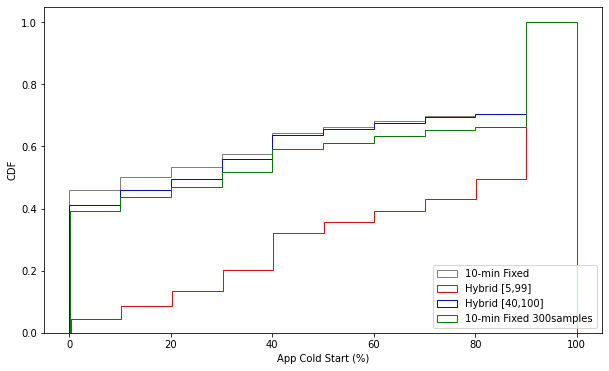

In [102]:
# plt.hist(cold_keep_alive, cumulative=True, histtype='step', density=True, color='b')
plt.figure(figsize=(10,6))
_, _, patches0=plt.hist(cold_fixed10mins_500sample, cumulative=True, histtype='step', density=True, color='grey')
_, _, patches1=plt.hist(cold_hybrid_5_99_sample500, cumulative=True, histtype='step', density=True, color='red')
_, _, patches2=plt.hist(cold_hybrid_40_100, cumulative=True, histtype='step', density=True, color='blue')
_, _, patches3=plt.hist(cold_fixed10mins_300sample, cumulative=True, histtype='step', density=True, color='green')
# _, _, patches4=plt.hist(cold_hybrid_no_PW, cumulative=True, histtype='step', density=True, color='orange')
patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
# patches3[0].set_xy(patches3[0].get_xy()[:-1])
# patches4[0].set_xy(patches4[0].get_xy()[:-1])
plt.xlabel("App Cold Start (%)")
plt.ylabel("CDF")
plt.legend(["10-min Fixed", "Hybrid [5,99]", "Hybrid [40,100]", "10-min Fixed 300samples","Hybrid [0,100]"],loc=4)
# plt.savefig('../exp/cold_start_hybrid.pdf')

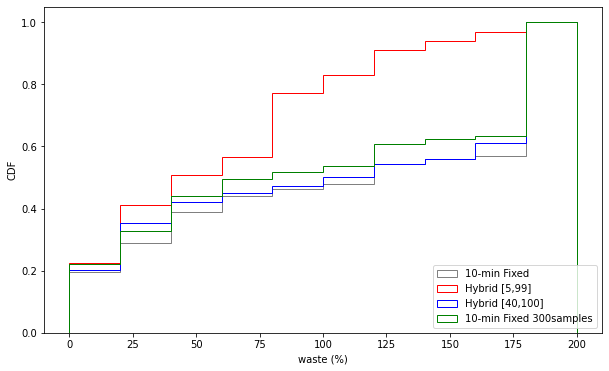

In [104]:
# plt.hist(cold_keep_alive, cumulative=True, histtype='step', density=True, color='b')
plt.figure(figsize=(10,6))
_, _, patches0=plt.hist(waste_fixed10mins_500sample, cumulative=True, histtype='step', density=True, color='grey')
_, _, patches1=plt.hist(waste_hybrid_5_99_sample500, cumulative=True, histtype='step', density=True, color='red')
_, _, patches2=plt.hist(waste_hybrid_40_100, cumulative=True, histtype='step', density=True, color='blue')
_, _, patches3=plt.hist(waste_fixed10mins_300sample, cumulative=True, histtype='step', density=True, color='green')
# _, _, patches4=plt.hist(cold_hybrid_no_PW, cumulative=True, histtype='step', density=True, color='orange')
patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
# patches3[0].set_xy(patches3[0].get_xy()[:-1])
# patches4[0].set_xy(patches4[0].get_xy()[:-1])
plt.xlabel("waste (%)")
plt.ylabel("CDF")
plt.legend(["10-min Fixed", "Hybrid [5,99]", "Hybrid [40,100]", "10-min Fixed 300samples","Hybrid [0,100]"],loc=4)
# plt.savefig('../exp/cold_start_hybrid.pdf')

# 11.2 do

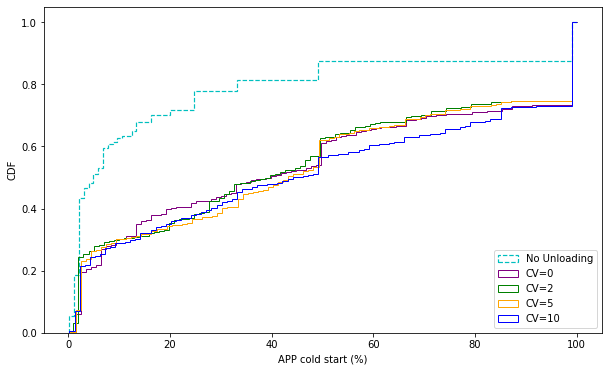

In [276]:
hybrid_5_99_CV0 = np.load('../result/debug/hybrid_5_99_CV0_KA5.npz')
hybrid_5_99_CV2 = np.load('../result/debug/hybrid_5_99_CV2_KA5.npz')
hybrid_5_99_CV5 = np.load('../result/debug/hybrid_5_99_CV5_KA5.npz')
hybrid_5_99_CV10 = np.load('../result/debug/hybrid_5_99_CV10_KA5.npz')

cold_hybrid_5_99_CV0 = hybrid_5_99_CV0["cold_start"]
cold_hybrid_5_99_CV2 = hybrid_5_99_CV2["cold_start"]
cold_hybrid_5_99_CV5 = hybrid_5_99_CV5["cold_start"]
cold_hybrid_5_99_CV10 = hybrid_5_99_CV10["cold_start"]

plt.figure(figsize=(10,6))

_, _, patches0=plt.hist(cold_unloading, cumulative=True, histtype='step', density=True, color='c',bins=106,linestyle='dashed',linewidth=1.2)

_, _, patches1=plt.hist(cold_hybrid_5_99_CV0, cumulative=True, histtype='step', density=True, color='purple',bins=100)
_, _, patches2=plt.hist(cold_hybrid_5_99_CV2, cumulative=True, histtype='step', density=True, color='green',bins=100)
_, _, patches3=plt.hist(cold_hybrid_5_99_CV5, cumulative=True, histtype='step', density=True, color='orange',bins=100)
_, _, patches4=plt.hist(cold_hybrid_5_99_CV10, cumulative=True, histtype='step', density=True, color='b',bins=100)

patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
patches3[0].set_xy(patches3[0].get_xy()[:-1])
patches4[0].set_xy(patches4[0].get_xy()[:-1])

plt.xlabel("APP cold start (%)")
plt.ylabel("CDF")
plt.legend(["No Unloading","CV=0","CV=2","CV=5","CV=10"],loc=4)
plt.savefig('../doc/fig18_app_cold_start_CV_KA5.pdf')

In [277]:
hybrid_5_99_CV10["waste_memory_time"].sum()

34411.0

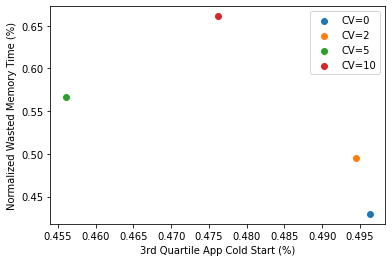

In [280]:
point_cold = [patches1[0].get_xy()[75][1],patches2[0].get_xy()[75][1],patches3[0].get_xy()[75][1],patches4[0].get_xy()[75][1]]
point_waste = [hybrid_5_99_CV0["waste_memory_time"].sum()/standard,hybrid_5_99_CV2["waste_memory_time"].sum()/standard,hybrid_5_99_CV5["waste_memory_time"].sum()/standard,hybrid_5_99_CV10["waste_memory_time"].sum()/standard]
for i in range(len(point_cold)):
    plt.scatter(point_cold[i],point_waste[i])
plt.legend(["CV=0","CV=2","CV=5","CV=10"])
plt.xlabel("3rd Quartile App Cold Start (%)")
plt.ylabel("Normalized Wasted Memory Time (%)")
plt.savefig("../doc/fig18_scatter.pdf")

In [242]:
hybrid_1_99 = np.load('../result/debug/hybrid_1_99.npz')
hybrid_5_99 = np.load('../result/debug/hybrid_5_99.npz')
hybrid_10_99 = np.load('../result/debug/hybrid_10_99.npz')

hybrid_1_95 = np.load('../result/debug/hybrid_1_95.npz')
hybrid_5_95 = np.load('../result/debug/hybrid_5_95.npz')
hybrid_10_95 = np.load('../result/debug/hybrid_10_95.npz')

hybrid_0_100 = np.load('../result/debug/hybrid_0_100.npz')
hybrid_5_100 = np.load('../result/debug/hybrid_5_100.npz')

# fixed10mins = np.load('../result/debug/fixed10mins.npz')
fixed5mins = np.load('../result/debug/fixed5mins.npz')

unloading = np.load('../result/debug/unloading.npz')

cold_hybrid_1_99, waste_hybrid_1_99 = hybrid_1_99["cold_start"], hybrid_1_99["waste_memory_time"]
cold_hybrid_5_99, waste_hybrid_5_99 = hybrid_5_99["cold_start"], hybrid_5_99["waste_memory_time"]
cold_hybrid_10_99, waste_hybrid_10_99 = hybrid_10_99["cold_start"], hybrid_10_99["waste_memory_time"]

cold_hybrid_1_95, waste_hybrid_1_95 = hybrid_1_95["cold_start"], hybrid_1_95["waste_memory_time"]
cold_hybrid_5_95, waste_hybrid_5_95 = hybrid_5_95["cold_start"], hybrid_5_95["waste_memory_time"]
cold_hybrid_10_95, waste_hybrid_10_95 = hybrid_10_95["cold_start"], hybrid_10_95["waste_memory_time"]

cold_hybrid_0_100, waste_hybrid_0_100 = hybrid_0_100["cold_start"], hybrid_0_100["waste_memory_time"]
cold_hybrid_5_100, waste_hybrid_5_100 = hybrid_5_100["cold_start"], hybrid_5_100["waste_memory_time"]

# cold_fixed10mins, waste_fixed10mins = fixed10mins["cold_start"], fixed10mins["waste_memory_time"]
cold_fixed5mins, waste_fixed5mins = fixed5mins["cold_start"], fixed5mins["waste_memory_time"]

cold_unloading, waste_unloading = unloading["cold_start"], unloading["waste_memory_time"]

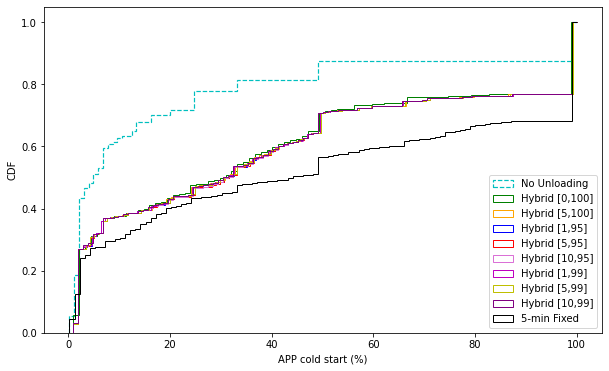

In [224]:
plt.figure(figsize=(10,6))

_, _, patches0=plt.hist(cold_unloading, cumulative=True, histtype='step', density=True, color='c',bins=106,linestyle='dashed',linewidth=1.2)

_, _, patches1=plt.hist(cold_hybrid_0_100, cumulative=True, histtype='step', density=True, color='green',bins=86)
_, _, patches2=plt.hist(cold_hybrid_5_100, cumulative=True, histtype='step', density=True, color='orange',bins=103)

_, _, patches3=plt.hist(cold_hybrid_1_95, cumulative=True, histtype='step', density=True, color='b',bins=110)
_, _, patches4=plt.hist(cold_hybrid_5_95, cumulative=True, histtype='step', density=True, color='red',bins=120)
_, _, patches5=plt.hist(cold_hybrid_10_95, cumulative=True, histtype='step', density=True, color='orchid',bins=101)

_, _, patches6=plt.hist(cold_hybrid_1_99, cumulative=True, histtype='step', density=True, color='m',bins=110)
_, _, patches7=plt.hist(cold_hybrid_5_99, cumulative=True, histtype='step', density=True, color='y',bins=120)
_, _, patches8=plt.hist(cold_hybrid_10_99, cumulative=True, histtype='step', density=True, color='purple',bins=101)

_, _, patches9=plt.hist(cold_fixed5mins, cumulative=True, histtype='step', density=True, color='black',bins=100)

patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
patches3[0].set_xy(patches3[0].get_xy()[:-1])
patches4[0].set_xy(patches4[0].get_xy()[:-1])
patches5[0].set_xy(patches5[0].get_xy()[:-1])
patches6[0].set_xy(patches6[0].get_xy()[:-1])
patches7[0].set_xy(patches7[0].get_xy()[:-1])
patches8[0].set_xy(patches8[0].get_xy()[:-1])
patches9[0].set_xy(patches9[0].get_xy()[:-1])
plt.xlabel("APP cold start (%)")
plt.ylabel("CDF")
plt.legend(["No Unloading","Hybrid [0,100]","Hybrid [5,100]","Hybrid [1,95]","Hybrid [5,95]", "Hybrid [10,95]" ,"Hybrid [1,99]","Hybrid [5,99]", "Hybrid [10,99]","5-min Fixed"],loc=4)
plt.savefig('../doc/fig16_app_cold_start.pdf')

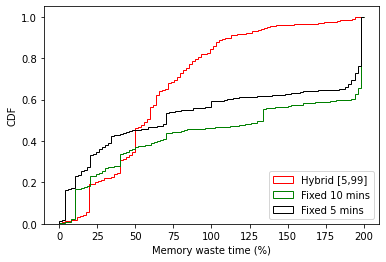

In [169]:
# plt.hist(waste_hybrid_1_99, cumulative=True, histtype='step', density=True, color='b',bins=10)
_, _, patches0=plt.hist(waste_hybrid_5_99, cumulative=True, histtype='step', density=True, color='red',bins=100)
# plt.hist(waste_hybrid_10_99, cumulative=True, histtype='step', density=True, color='grey',bins=10)
_, _, patches1=plt.hist(waste_fixed10mins, cumulative=True, histtype='step', density=True, color='green',bins=100)
_, _, patches2=plt.hist(waste_fixed5mins, cumulative=True, histtype='step', density=True, color='black',bins=100)
patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
plt.xlabel("Memory waste time (%)")
plt.ylabel("CDF")
plt.legend(["Hybrid [5,99]", "Fixed 10 mins", "Fixed 5 mins","Hybrid [0,100]"],loc=4)
plt.savefig('../doc/memory.pdf')

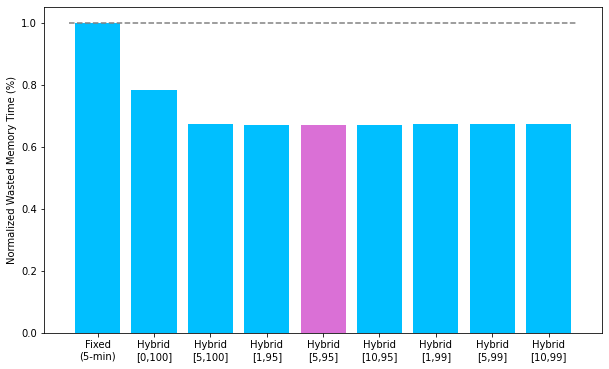

In [237]:
plt.figure(figsize=(10,6))
standard = waste_fixed5mins.sum()
waste_hist = [waste_fixed5mins.sum(),waste_hybrid_0_100.sum(),waste_hybrid_5_100.sum(),waste_hybrid_1_95.sum(),waste_hybrid_5_95.sum(),waste_hybrid_10_95.sum(), waste_hybrid_1_99.sum(), waste_hybrid_5_99.sum(), waste_hybrid_10_99.sum()]/standard

x_label = ['Fixed\n(5-min)', "Hybrid\n[0,100]","Hybrid\n[5,100]","Hybrid\n[1,95]","Hybrid\n[5,95]", "Hybrid\n[10,95]" ,"Hybrid\n[1,99]","Hybrid\n[5,99]", "Hybrid\n[10,99]"]
color=['deepskyblue','deepskyblue','deepskyblue','deepskyblue','orchid']

x=np.arange(len(waste_hist))
plt.xticks(x, x_label)
plt.bar(x, waste_hist, color=color)
plt.hlines(1.0, -0.5, 8.5, colors = "grey", linestyles = "dashed")
plt.ylabel("Normalized Wasted Memory Time (%)")
plt.savefig('../doc/fig16_waste_bar.pdf')

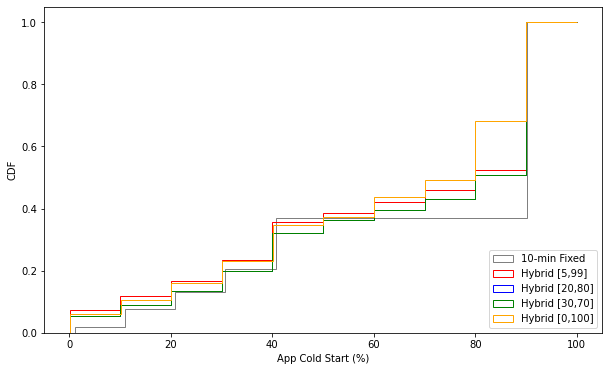

In [180]:
# plt.hist(cold_keep_alive, cumulative=True, histtype='step', density=True, color='b')
plt.figure(figsize=(10,6))
_, _, patches0=plt.hist(cold_keep_alive2, cumulative=True, histtype='step', density=True, color='grey')
_, _, patches1=plt.hist(cold_hybrid2, cumulative=True, histtype='step', density=True, color='red')
_, _, patches2=plt.hist(cold_hybrid20, cumulative=True, histtype='step', density=True, color='blue')
_, _, patches3=plt.hist(cold_hybrid30, cumulative=True, histtype='step', density=True, color='green')
_, _, patches4=plt.hist(cold_hybrid_no_PW, cumulative=True, histtype='step', density=True, color='orange')
patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
patches3[0].set_xy(patches3[0].get_xy()[:-1])
patches4[0].set_xy(patches4[0].get_xy()[:-1])
plt.xlabel("App Cold Start (%)")
plt.ylabel("CDF")
plt.legend(["10-min Fixed", "Hybrid [5,99]", "Hybrid [20,80]", "Hybrid [30,70]","Hybrid [0,100]"],loc=4)
plt.savefig('../exp/cold_start_hybrid.pdf')

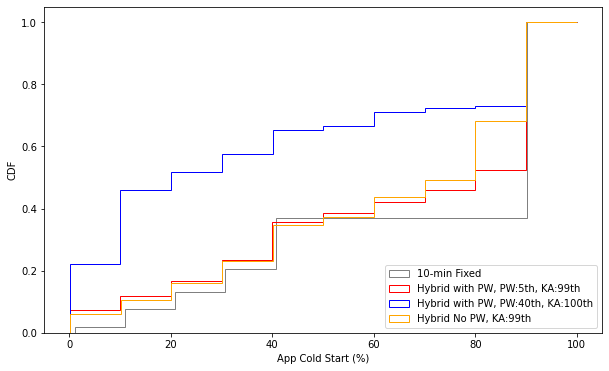

In [179]:
plt.figure(figsize=(10,6))
_, _, patches0=plt.hist(cold_keep_alive2, cumulative=True, histtype='step', density=True, color='grey')
_, _, patches1=plt.hist(cold_hybrid2, cumulative=True, histtype='step', density=True, color='red')
_, _, patches2=plt.hist(cold_hybrid_40, cumulative=True, histtype='step', density=True, color='blue')
_, _, patches4=plt.hist(cold_hybrid_no_PW, cumulative=True, histtype='step', density=True, color='orange')
patches0[0].set_xy(patches0[0].get_xy()[:-1])
patches1[0].set_xy(patches1[0].get_xy()[:-1])
patches2[0].set_xy(patches2[0].get_xy()[:-1])
patches4[0].set_xy(patches4[0].get_xy()[:-1])
plt.xlabel("App Cold Start (%)")
plt.ylabel("CDF")
plt.legend(["10-min Fixed", "Hybrid with PW, PW:5th, KA:99th", "Hybrid with PW, PW:40th, KA:100th","Hybrid No PW, KA:99th"],loc=4)
plt.savefig('../exp/cold_start_hybrid_optimal_para.pdf')

In [137]:
WMT_0_100 = waste_hybrid_no_PW.sum()/100

WMT_5_99 = waste_hybrid2.sum()/200/WMT_0_100
WMT_20_80 = waste_hybrid20.sum()/200/WMT_0_100
WMT_30_70 = waste_hybrid30.sum()/200/WMT_0_100
WMT_40_100 = waste_hybrid_40.sum()/100/WMT_0_100

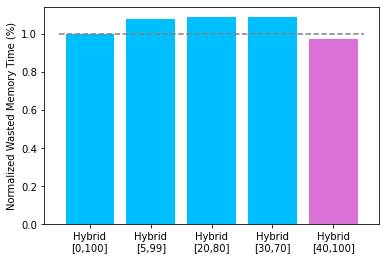

In [166]:
waste_hist = [1,WMT_5_99,WMT_20_80,WMT_30_70,WMT_40_100]
x_label = ['Hybrid\n[0,100]','Hybrid\n[5,99]','Hybrid\n[20,80]','Hybrid\n[30,70]','Hybrid\n[40,100]']
color=['deepskyblue','deepskyblue','deepskyblue','deepskyblue','orchid']

x=np.arange(len(waste_hist))
plt.xticks(x, x_label)
plt.bar(x, waste_hist, color=color)
plt.hlines(1.0, -0.5, 4.5, colors = "grey", linestyles = "dashed")
plt.ylabel("Normalized Wasted Memory Time (%)")
plt.savefig('../exp/waste_memory_time.pdf')

In [20]:
import pandas as pd
df = pd.read_csv('data/app_invocation.csv')

In [21]:
df.shape 

(45412, 1452)

In [ ]:
def sample_invocation(df, invocation_nums=200):
    df['invocation_sum'] = df[[str(i) for i in range(1,1440)]].sum(axis=1)
    return df[df['invocation_sum']<=200]    # 45412-14736 (<200 times)

In [16]:
df['invocation_sum'] = df[[str(i) for i in range(1,1440)]].sum(axis=1)

In [19]:
df[df['invocation_sum']>200]

,Unnamed: 0,HashOwner,HashApp,HashFunction,Trigger,1,2,3,4,5,...,1439,1440,day,AverageMem,AverageAllocatedMb_pct1,AverageAllocatedMb_pct100,AverageDuration,MinimumDuration,MaximumDuration,invocation_sum
0,0,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,0,0,0,1,0,...,0,0,3,105,101,108,48,11.0,4183.0,287
2,2,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,0d0ac65651f54ae3285a59564d64e39238b516fa1d5b56...,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,0,0,0,1,0,...,0,0,3,117,116,121,29,11.0,86.0,287
12,12,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,33429bc85e5fc1a07053b627f7055c0d37300da4db44aa...,http,0,0,0,0,0,...,0,0,3,152,128,165,11,3.0,293.0,429
17,17,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,4b514f1006624660b978550c53392657f9b37bbaf2c1dd...,http,0,0,0,0,0,...,0,0,3,152,128,165,20,3.0,317.0,555
20,20,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,b83b1aab2caeed6ea8fb204f414856fb2a8dd5a8856354...,http,0,0,1,0,0,...,1,0,3,152,128,165,14,1.0,209.0,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45367,45367,4b07ef8fa03074fc47219919c1bbd1bcfc435b24c87734...,9b071107a16865bebaf74d9ca0dd439616eb662bc865be...,a14fadda5222605389b04dcf1f5c038f700f2f559442f8...,timer,12,12,12,12,12,...,12,12,3,109,109,110,3,0.0,2057.0,17268
45391,45391,4b07ef8fa03074fc47219919c1bbd1bcfc435b24c87734...,2206ae3de14a822948574497c138c53d7793a255b4cc2b...,abe2603fa7e5cbf69d4add04c827516746b1777839c728...,timer,10,10,10,10,10,...,10,10,3,136,109,165,2,0.0,4008.0,14382
45392,45392,4b07ef8fa03074fc47219919c1bbd1bcfc435b24c87734...,c5b2190bf9603f1f53961da4604bdd8ce84270add18bcb...,b97a50e2c0d14d85bcd0011b19f17994e5850f1dc84c59...,timer,10,10,10,10,10,...,10,10,3,110,110,111,3,0.0,2011.0,14390
45401,45401,1bef929a8359f486b6fa1498c5ff6592f624d29a38df5e...,34a55f66ecb378c960b558218269520a940ffa0f74c96c...,0390102b410f7d3abfaea5e30493b4b96c39b66cab4e35...,timer,1,0,0,1,0,...,0,0,3,113,113,113,218,171.0,484.0,480
